In [1]:
from functions.data_functions import load_data, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import arviz as az
import numpy as np

## Read in data and preprocess data

In [2]:
pca_df = load_data('BEACON', 'pca_df')

In [3]:
comp = ['comp_1', 'comp_2','comp_3']

In [4]:
for component in comp:
    pca_df[f'{component}_t1_demean'] = pca_df[f'{component}_t1'] - pca_df[f'{component}_t1'].mean()

pca_df['group_ind'] = pca_df['group'].apply(lambda group: 0 if group =='HC' else 1)

In [5]:
pca_df

,index,G_Number,comp_1_t1,comp_2_t1,comp_3_t1,B_Number,comp_1_t2,comp_2_t2,comp_3_t2,group,comp_1_t1_demean,comp_2_t1_demean,comp_3_t1_demean,group_ind
0,0,G1038,-3.330858,-0.038814,0.053992,B1002,-2.809328,-1.496931,2.171887,HC,-3.330858,-0.038814,0.053992,0
1,1,G1010,-3.675288,-0.306146,0.425690,B1003,-3.492470,-0.294061,-0.220119,HC,-3.675288,-0.306146,0.425690,0
2,2,G1014,-3.462899,-0.216312,0.492204,B1004,-1.462532,0.474414,0.787114,HC,-3.462899,-0.216312,0.492204,0
3,3,G1023,-1.433229,-0.125526,1.165611,B1007,-1.242177,-0.632335,0.733666,HC,-1.433229,-0.125526,1.165611,0
4,4,G1022,-0.338717,1.220852,0.823205,B1009,-0.717742,1.259611,2.164392,HC,-0.338717,1.220852,0.823205,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,111,G2141,2.448469,-0.701650,-0.410376,B2091,1.922807,0.933933,-0.793016,AN,2.448469,-0.701650,-0.410376,1
112,112,G2138,-1.598782,-0.656621,-1.344820,B2092,0.064752,-0.222998,-0.289193,AN,-1.598782,-0.656621,-1.344820,1
113,113,G2140,2.620445,-2.088359,-0.999341,B2093,3.866470,-2.232530,-0.834078,AN,2.620445,-2.088359,-0.999341,1
114,114,G2105,2.303525,-0.276979,0.238688,B2094,4.305718,-1.430161,0.215596,AN,2.303525,-0.276979,0.238688,1


## Load pickle objects

In [6]:
t1_models = load_pickle('t1_models')
t2_models = load_pickle('t2_models')
fitted_models = load_pickle('fitted_models_group')
model_summary = load_pickle('model_summary_group')
correlation_coeffients = load_pickle('correlation_coeffients_group')

## Exploatory data analysis

<AxesSubplot: xlabel='group', ylabel='comp_3_t2'>

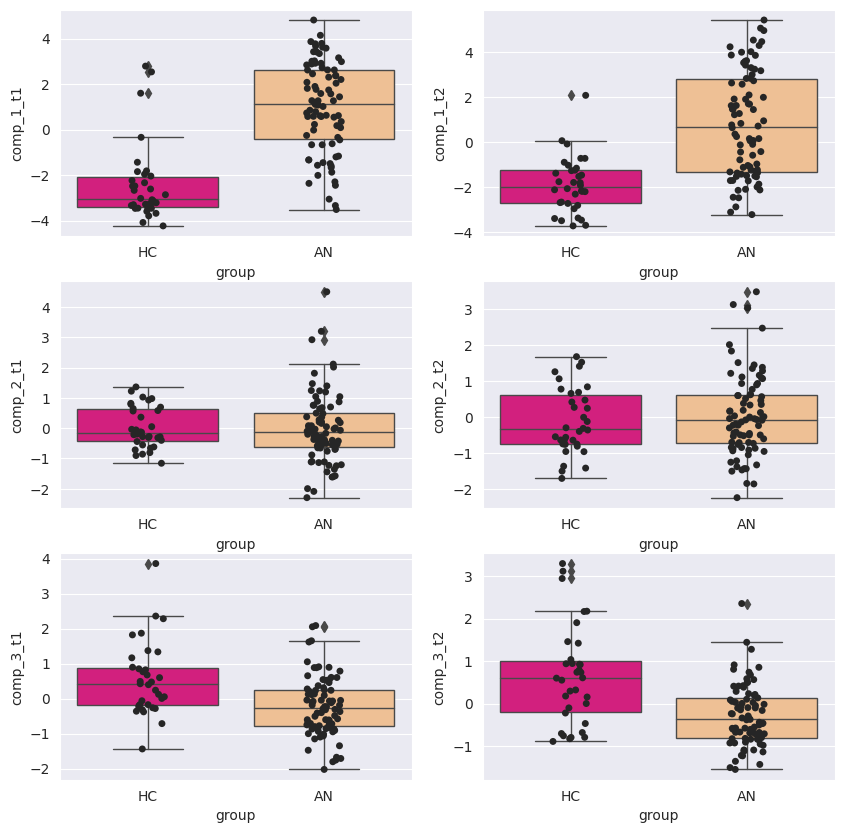

In [7]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.boxplot(x='group', y='comp_1_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[0][0])
sns.stripplot(x="group", y="comp_1_t1", data=pca_df, color=".15", ax=ax[0][0])
sns.boxplot(x='group', y='comp_1_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[0][1])
sns.stripplot(x="group", y="comp_1_t2", data=pca_df, color=".15", ax=ax[0][1])

sns.boxplot(x='group', y='comp_2_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[1][0])
sns.stripplot(x="group", y="comp_2_t1", data=pca_df, color=".15", ax=ax[1][0])
sns.boxplot(x='group', y='comp_2_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[1][1])
sns.stripplot(x="group", y="comp_2_t2", data=pca_df, color=".15", ax=ax[1][1])

sns.boxplot(x='group', y='comp_3_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[2][0])
sns.stripplot(x="group", y="comp_3_t1", data=pca_df, color=".15", ax=ax[2][0])
sns.boxplot(x='group', y='comp_3_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[2][1])
sns.stripplot(x="group", y="comp_3_t2", data=pca_df, color=".15", ax=ax[2][1])

<AxesSubplot: >

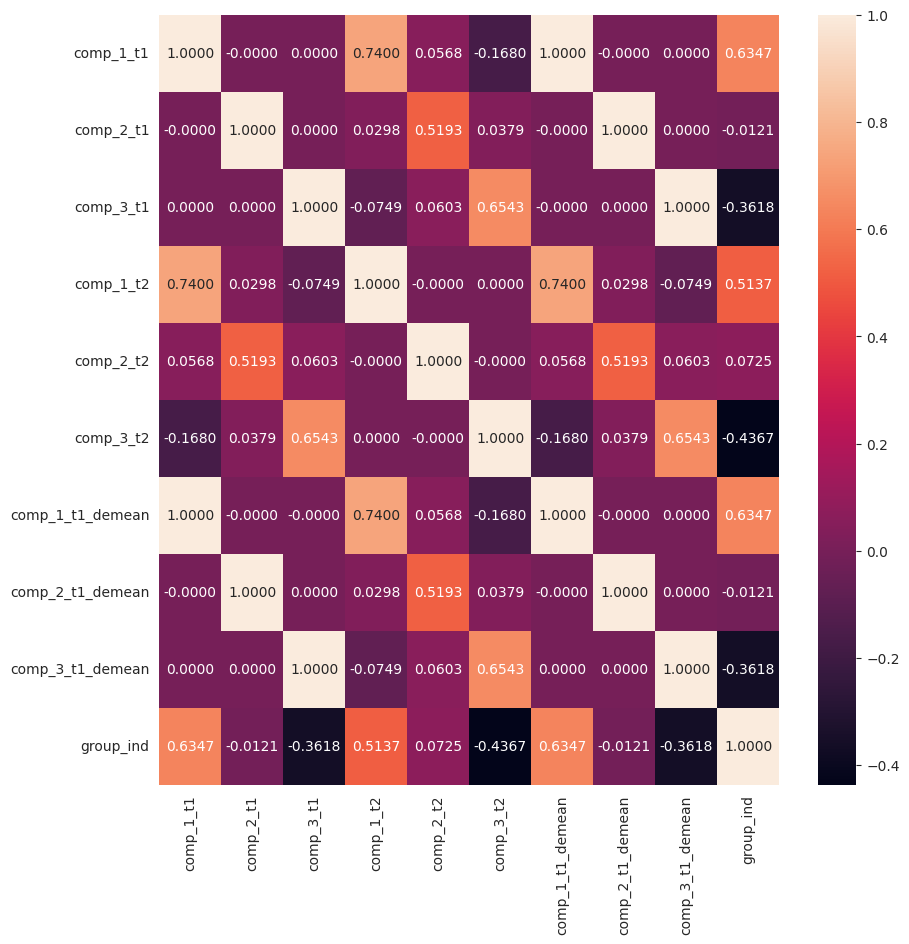

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(pca_df[['comp_1_t1','comp_2_t1', 'comp_3_t1', 'comp_1_t2', 'comp_2_t2', 'comp_3_t2', 'comp_1_t1_demean', 'comp_2_t1_demean', 'comp_3_t1_demean','group_ind']].corr(),  annot=True,  fmt=".4f")

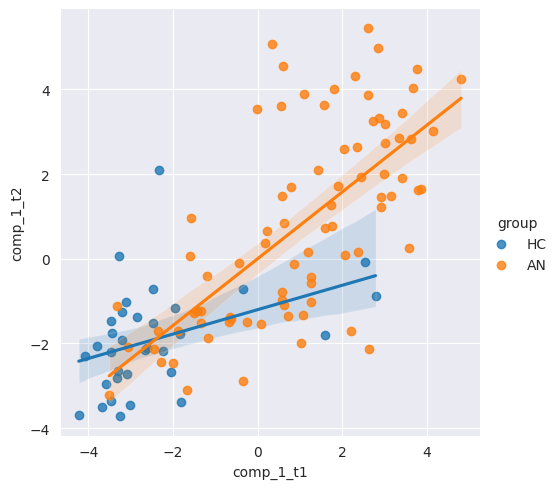

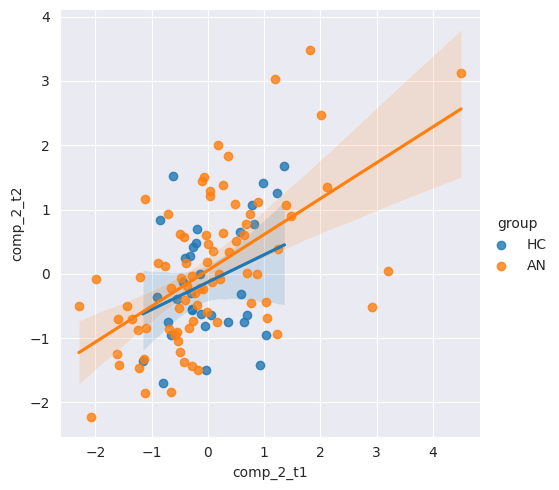

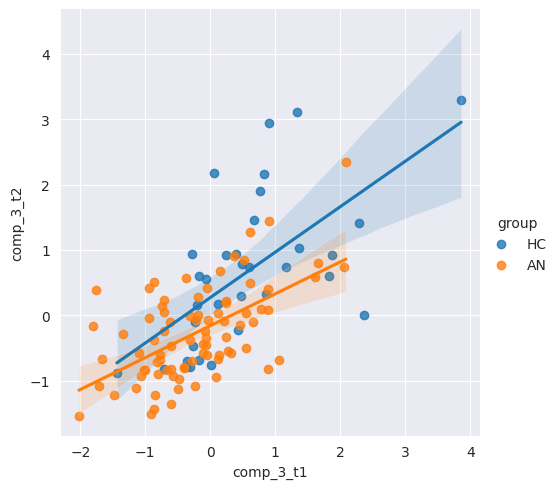

In [9]:
for component in comp:
    sns.lmplot(x=f'{component}_t1', y=f'{component}_t2', hue='group', data=pca_df)

In [10]:
groups = pca_df.groupby('group')
hc = groups.get_group('HC')
an = groups.get_group('AN')

for compent in comp:
    print('HC t1', compent, 'mean', hc[f'{compent}_t1_demean'].mean(), 'std', hc[f'{compent}_t1_demean'].std())
    print('HC t2', compent, 'mean', hc[f'{compent}_t2'].mean(), 'std', hc[f'{compent}_t2'].std(),'\n')
    print('AN t1', compent, 'mean', an[f'{compent}_t1_demean'].mean(), 'std', an[f'{compent}_t1_demean'].std())
    print('AN t2', compent, 'mean', an[f'{compent}_t2'].mean(), 'std', an[f'{compent}_t2'].std(),'\n')

HC t1 comp_1 mean -2.415574106800276 std 1.698392568958914
HC t2 comp_1 mean -1.8997894819110446 std 1.2304486319542964 

AN t1 comp_1 mean 1.0015795076976752 std 1.990146513857248
AN t2 comp_1 mean 0.7877175900606768 std 2.3157917755015927 

HC t1 comp_2 mean 0.01929451674697587 std 0.6804485900698554
HC t2 comp_2 mean -0.12070770012626392 std 0.9135498864744594 

AN t1 comp_2 mean -0.008000165480453418 std 1.1536399689573775
AN t2 comp_2 mean 0.05004953419869476 std 1.1389487126583617 

HC t1 comp_3 mean 0.5385376786774233 std 1.0350242339144125
HC t2 comp_3 mean 0.6461716814464212 std 1.1568770718426002 

AN t1 comp_3 mean -0.22329611067112673 std 0.8408537483947933
AN t2 comp_3 mean -0.267924843526565 std 0.7117786244325316 



## Difference at time point one

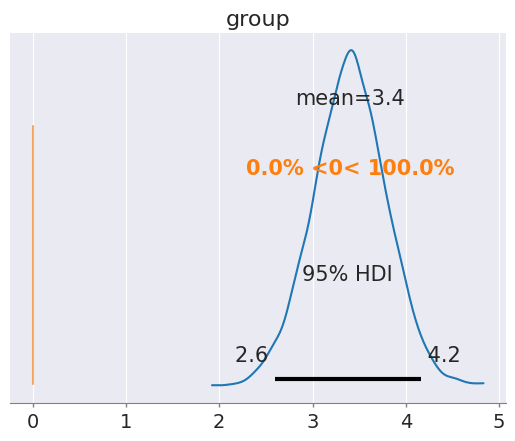

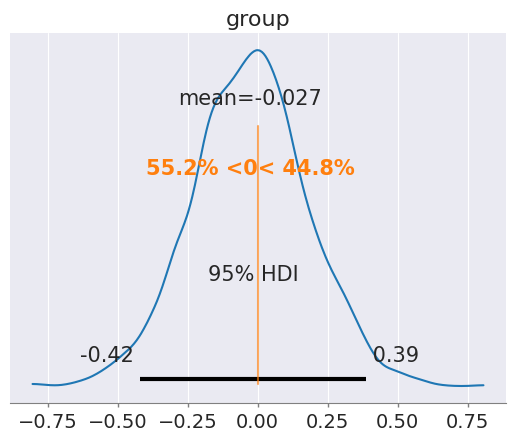

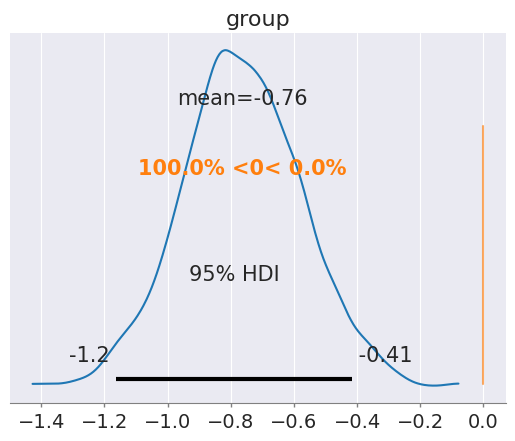

In [11]:
for model in t1_models.keys():
    post_group = t1_models[model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0, hdi_prob=0.95)

## Difference at time point two

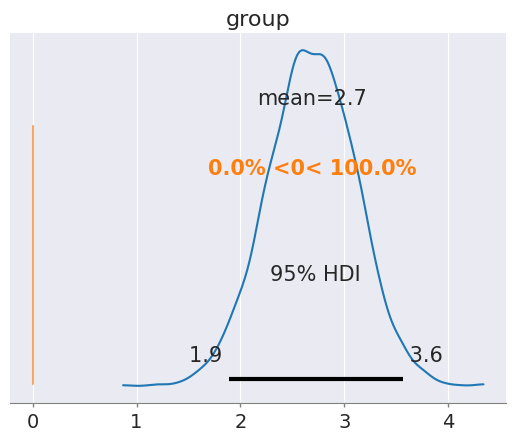

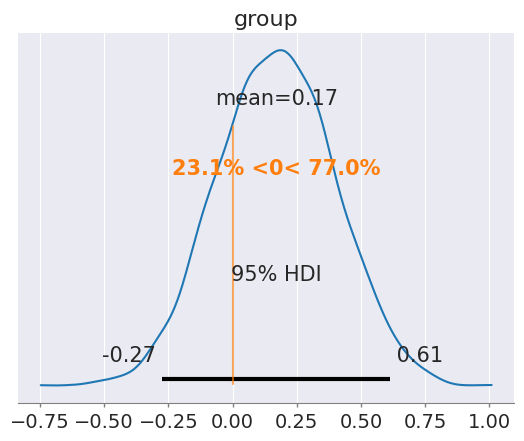

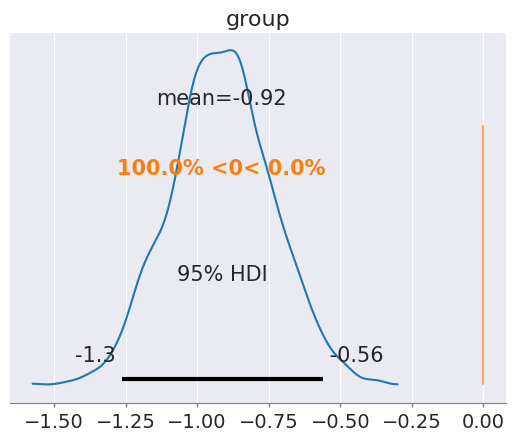

In [12]:
for model in t2_models.keys():
    post_group = t2_models[model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0, hdi_prob=0.95)

## Predictive models

In [13]:
model_summary['comp_1']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_1_t1_demean,0.500,0.811,-0.782,1.831,0.025,0.017,1221.0,1326.0,1.01
group[AN],0.013,0.201,-0.322,0.339,0.005,0.005,1942.0,502.0,1.00
group[HC],-1.128,0.491,-1.938,-0.307,0.008,0.006,3750.0,4634.0,1.00
comp_1_t1_demean|group[AN],0.277,0.812,-0.999,1.621,0.025,0.018,1173.0,1260.0,1.01
comp_1_t1_demean|group[HC],-0.180,0.813,-1.561,1.063,0.024,0.017,1206.0,1360.0,1.00
comp_1_t1_demean|group_sigma,1.107,0.980,0.014,2.409,0.023,0.016,752.0,371.0,1.00
comp_1_t2_sigma,1.589,0.106,1.420,1.767,0.002,0.001,4845.0,4872.0,1.00


In [14]:
model_summary['comp_2']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_2_t1_demean,0.461,0.724,-0.677,1.483,0.023,0.016,1360.0,923.0,1.01
group[AN],0.055,0.104,-0.106,0.232,0.001,0.001,4827.0,4167.0,1.00
group[HC],-0.132,0.161,-0.387,0.139,0.002,0.002,5287.0,4487.0,1.00
comp_2_t1_demean|group[AN],0.090,0.724,-0.994,1.179,0.023,0.016,1371.0,944.0,1.00
comp_2_t1_demean|group[HC],-0.006,0.724,-1.078,1.099,0.023,0.016,1407.0,965.0,1.01
comp_2_t1_demean|group_sigma,0.841,0.950,0.013,2.083,0.024,0.017,1312.0,1928.0,1.00
comp_2_t2_sigma,0.934,0.064,0.832,1.040,0.001,0.001,4970.0,4009.0,1.00


In [15]:
model_summary['comp_3']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_3_t1_demean,0.519,0.728,-0.595,1.545,0.031,0.026,1094.0,820.0,1.0
group[AN],-0.158,0.080,-0.292,-0.030,0.001,0.001,5190.0,3747.0,1.0
group[HC],0.281,0.134,0.058,0.501,0.002,0.001,4857.0,4760.0,1.0
comp_3_t1_demean|group[AN],-0.019,0.731,-1.057,1.097,0.031,0.030,1075.0,823.0,1.0
comp_3_t1_demean|group[HC],0.159,0.731,-0.885,1.254,0.031,0.030,1106.0,830.0,1.0
comp_3_t1_demean|group_sigma,0.852,0.939,0.019,2.099,0.030,0.022,1092.0,1279.0,1.0
comp_3_t2_sigma,0.702,0.049,0.624,0.781,0.001,0.000,5127.0,4088.0,1.0


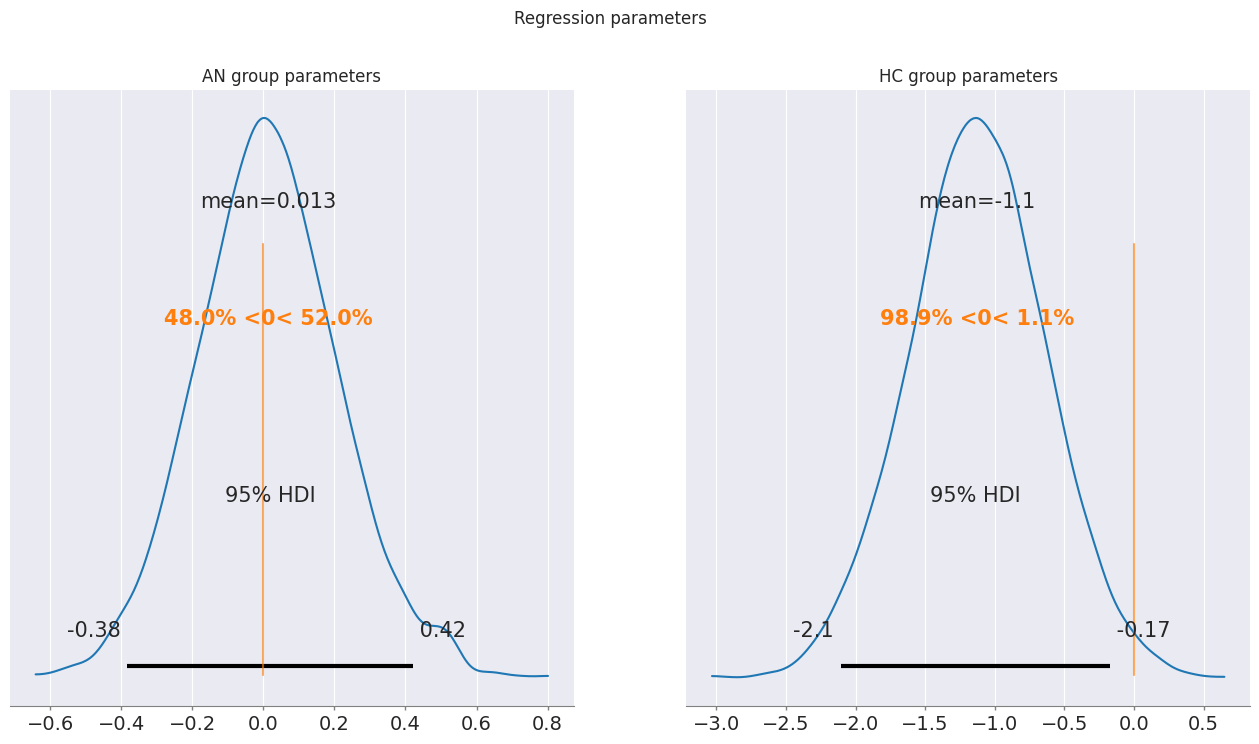

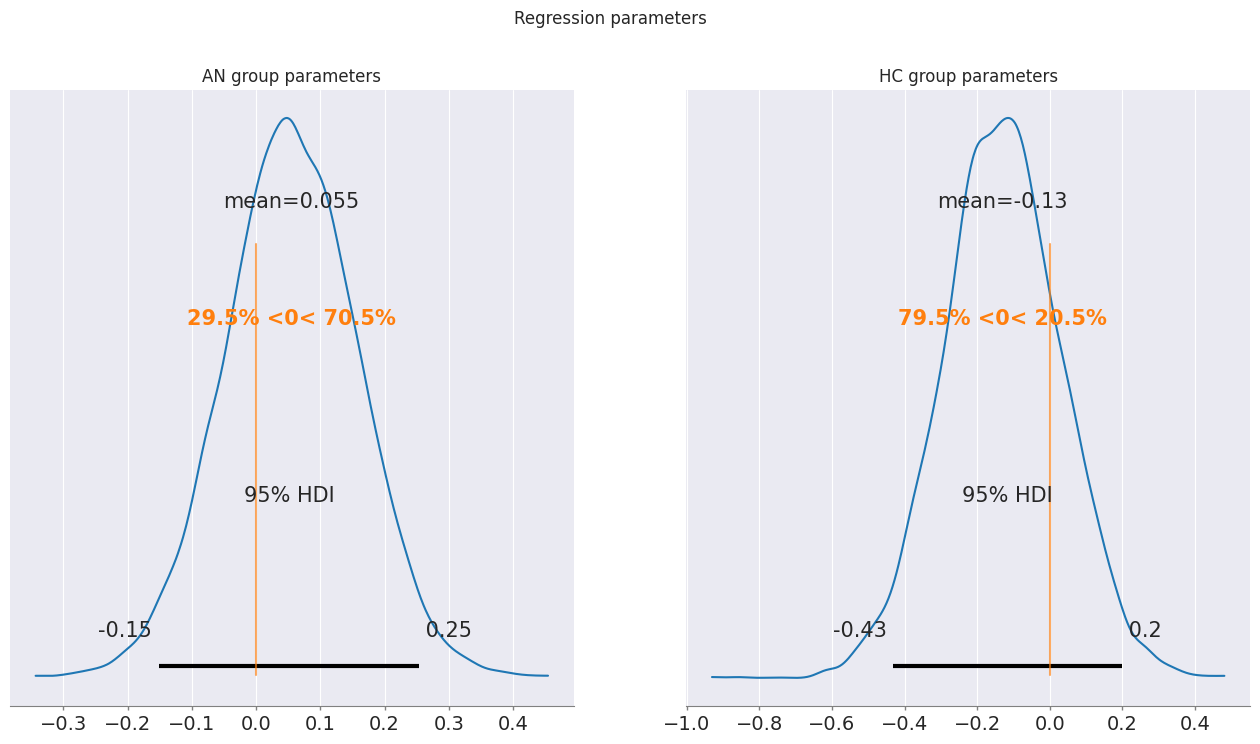

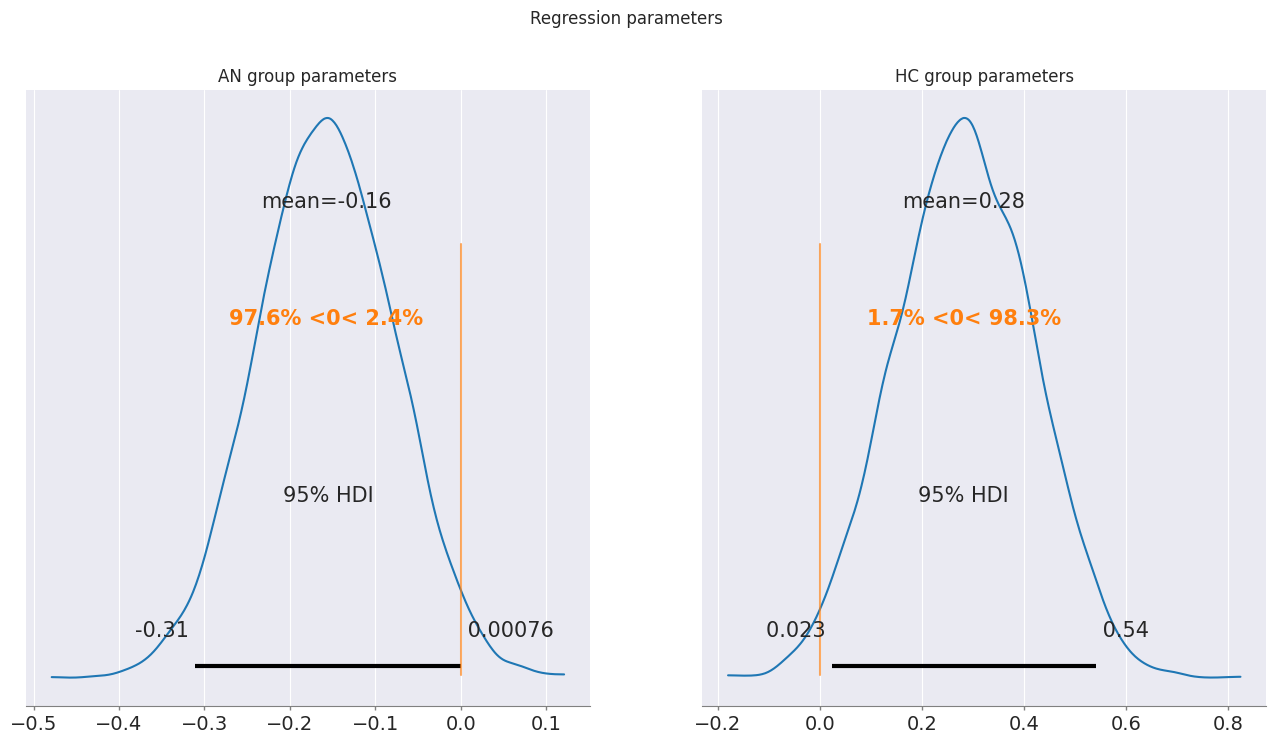

In [16]:
for component in comp:
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('Regression parameters')
    group_parameteres = fitted_models['alternative'][component].posterior["group"]
    az.plot_posterior(group_parameteres.sel(group_dim="AN"), ref_val=0, ax = ax[0], hdi_prob=0.95)
    az.plot_posterior(group_parameteres.sel(group_dim="HC"), ref_val=0, ax = ax[1], hdi_prob=0.95)
    ax[0].set_title('AN group parameters')
    ax[1].set_title('HC group parameters')

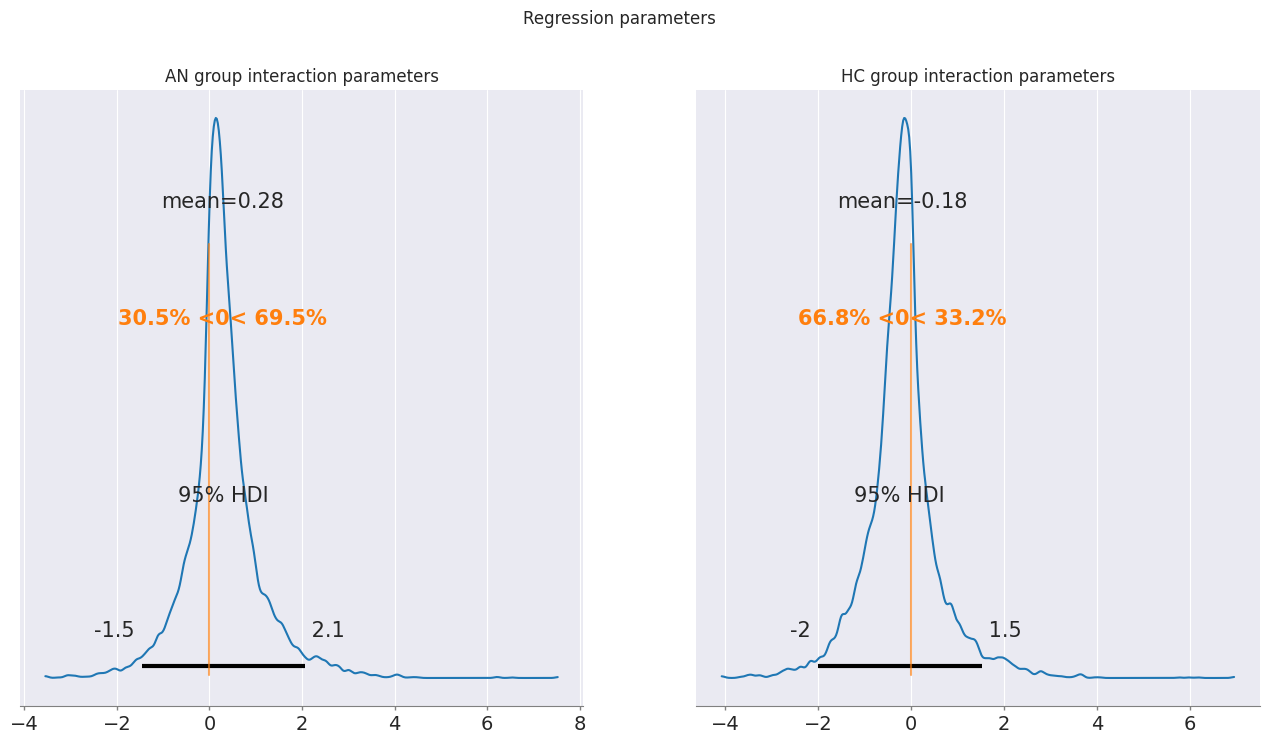

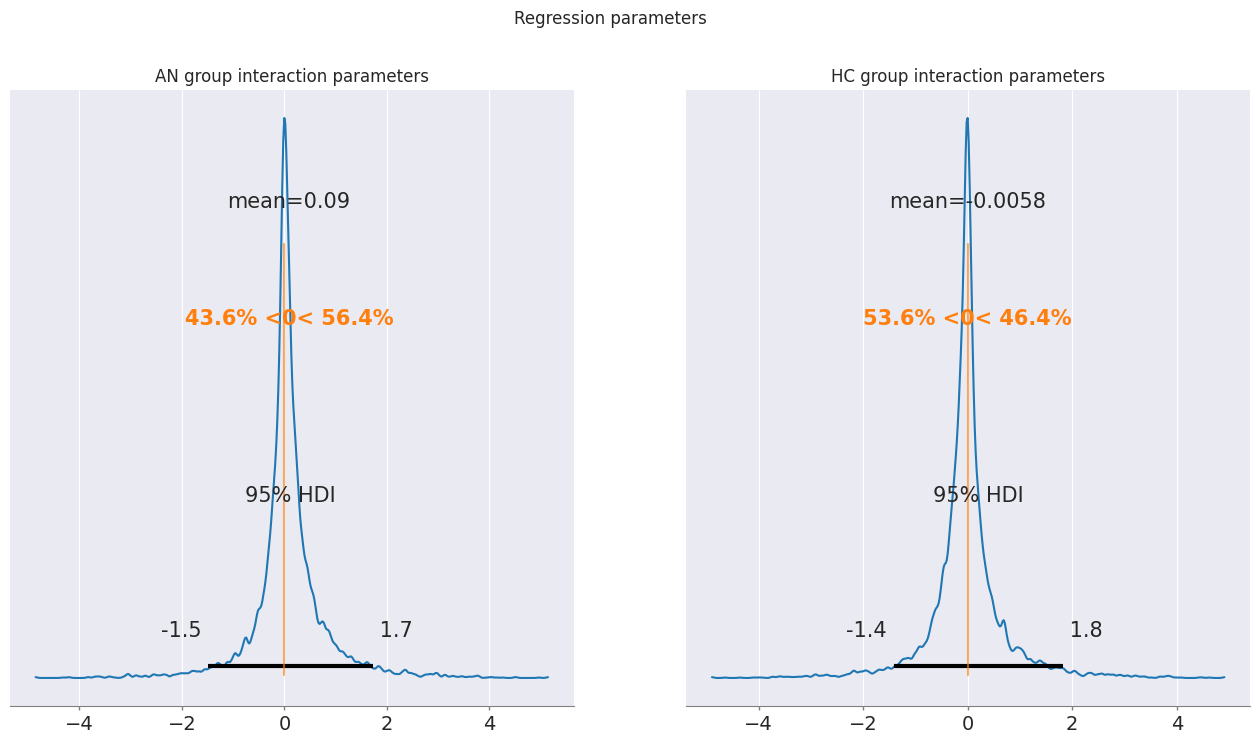

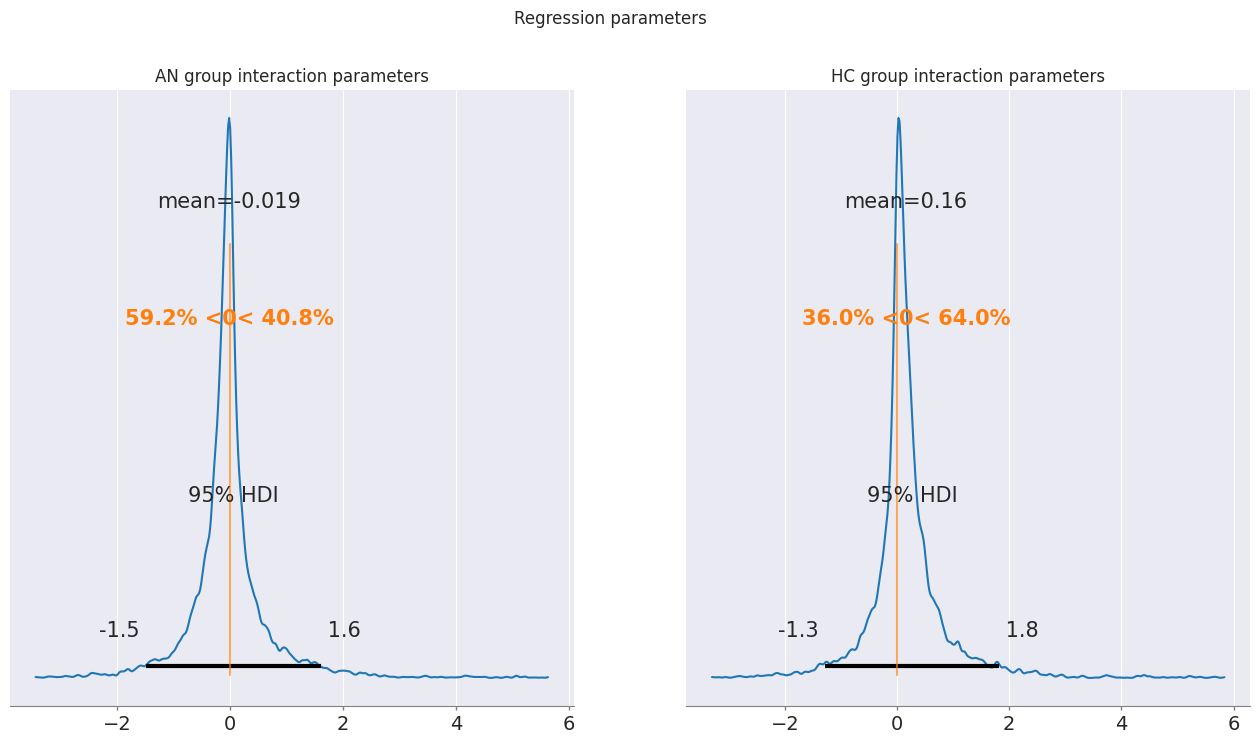

In [17]:
for component in comp:
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('Regression parameters')
    group_parameteres = fitted_models['alternative'][component].posterior[f'{component}_t1_demean|group']
    az.plot_posterior(group_parameteres.sel(group__factor_dim="AN"), ref_val=0, ax = ax[0], hdi_prob=0.95)
    az.plot_posterior(group_parameteres.sel(group__factor_dim="HC"), ref_val=0, ax = ax[1], hdi_prob=0.95)
    ax[0].set_title('AN group interaction parameters')
    ax[1].set_title('HC group interaction parameters')

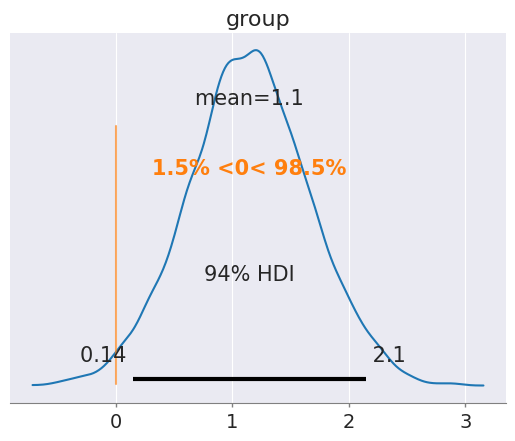

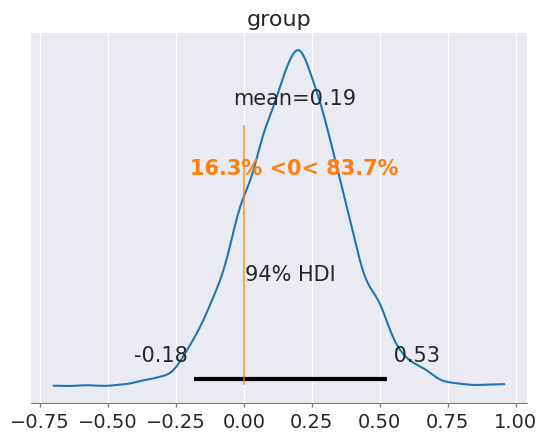

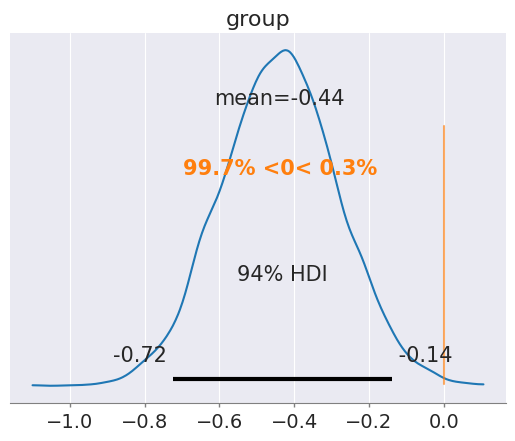

In [18]:
for model in comp:
    post_group = fitted_models['alternative'][model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0)

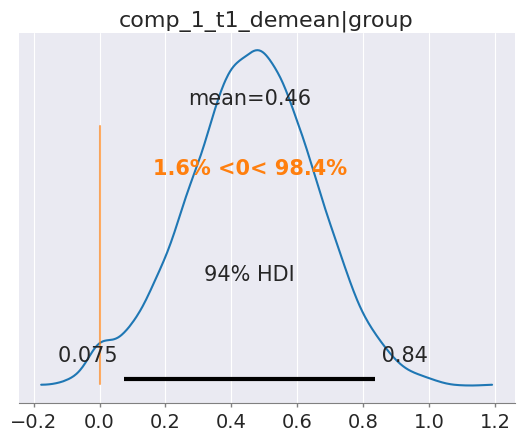

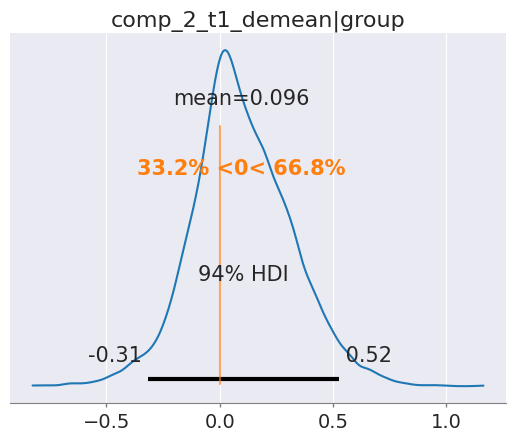

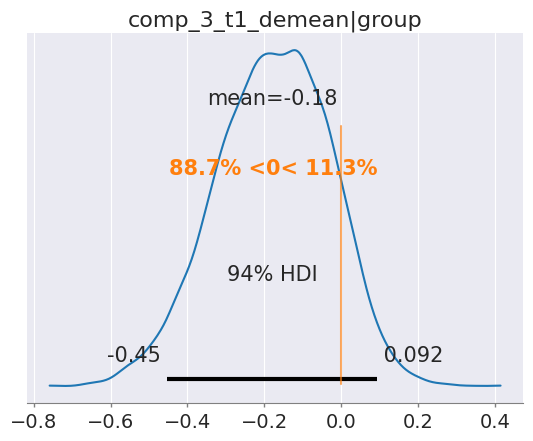

In [19]:
for model in comp:
    post_group = fitted_models['alternative'][model].posterior[f'{model}_t1_demean|group']
    diff = post_group.sel(group__factor_dim="AN") - post_group.sel(group__factor_dim="HC")
    az.plot_posterior(diff, ref_val=0)

## Model comparisons

In [20]:
model_comparisons = {}

for component in comp:
    az_comparison = az.compare({f'null_{component}' : fitted_models['null'][component], f'alternative_{component}': fitted_models['alternative'][component]})
    model_comparisons[component] = az_comparison

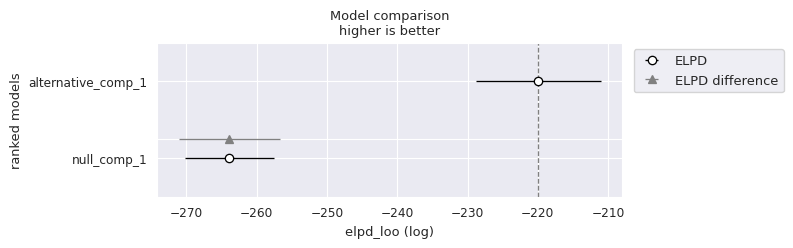

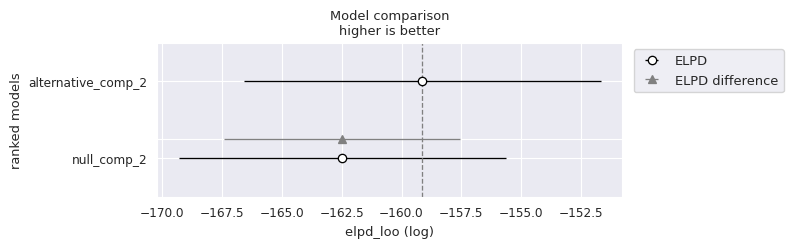

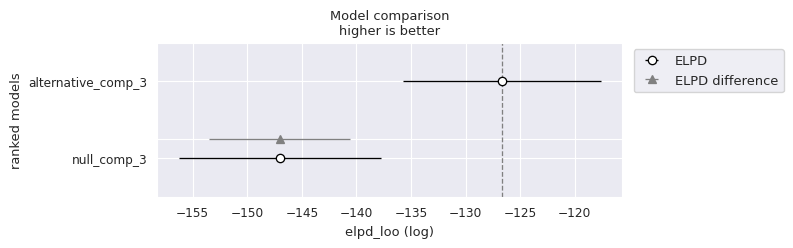

In [21]:
for plot in comp:
    az.plot_compare(model_comparisons[plot])

## Correlation co-efficents

In [22]:
for component in comp:
    print(component, 'AN', np.array(correlation_coeffients[component]['an_joint_posterior_distribution']).mean())
    print(component, 'HC', np.array(correlation_coeffients[component]['hc_joint_posterior_distribution']).mean())
    print(component, 'comp', np.array(correlation_coeffients[component]['comp_joint_posterior_distribution']).mean())

comp_1 AN 0.015735168626755485
comp_1 HC -0.29387924715207414
comp_1 comp 0.09163101512716246
comp_2 AN 0.06187744988881899
comp_2 HC -0.06564446070071879
comp_2 comp 0.1963352740318029
comp_3 AN -0.20373758127493394
comp_3 HC 0.18129541169085492
comp_3 comp 0.26213937123762543


In [23]:
for component in comp:
    prob = (correlation_coeffients[component]['an_joint_posterior_distribution'] ** 2 > correlation_coeffients[component]['hc_joint_posterior_distribution']  ** 2).mean().item()
    #if prob > 0.5:
        print(f'Probability of AN joint posterior distribution > HC for {component} is ', prob * 100, '\n')
    if prob < 0.5:
         prob_max = (correlation_coeffients[component]['an_joint_posterior_distribution'] ** 2 < correlation_coeffients[component]['hc_joint_posterior_distribution']  ** 2).mean().item()
         print(f'Probability of HC joint posterior distribution > AN for {component} is ', prob_max * 100, '\n')

IndentationError: unexpected indent (2244215850.py, line 4)

Text(0, 0.5, 'AN')

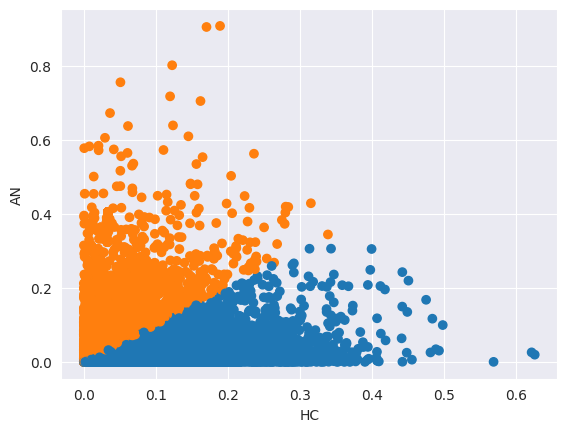

In [ ]:
sq_partial_an_comp_1 = correlation_coeffients['comp_1']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_1 = correlation_coeffients['comp_1']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_1 > sq_partial_hc_comp_1, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_1, y=sq_partial_an_comp_1, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")

Text(0, 0.5, 'AN')

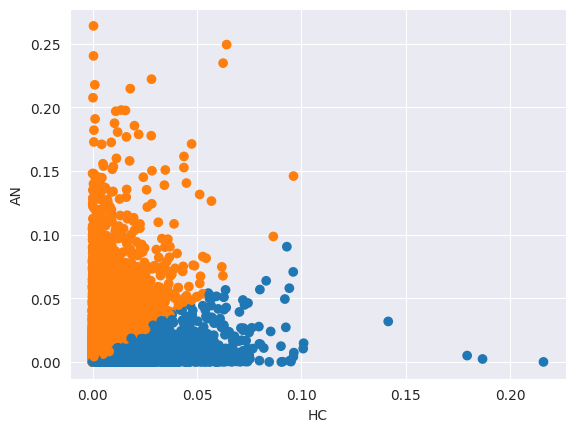

In [ ]:
sq_partial_an_comp_2 = correlation_coeffients['comp_2']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_2 = correlation_coeffients['comp_2']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_2 > sq_partial_hc_comp_2, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_2, y=sq_partial_an_comp_2, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")

Text(0, 0.5, 'AN')

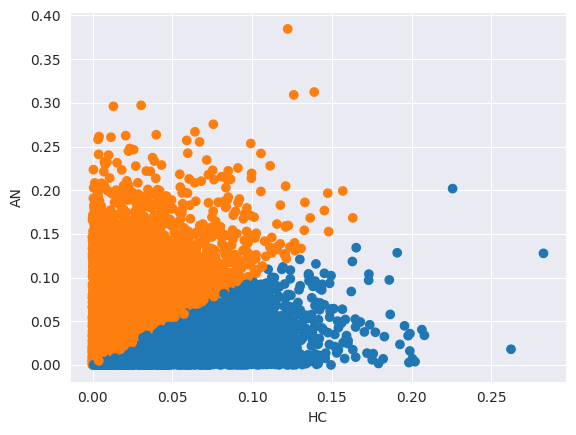

In [ ]:
sq_partial_an_comp_3 = correlation_coeffients['comp_3']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_3 = correlation_coeffients['comp_3']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_3 > sq_partial_hc_comp_3, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_3, y=sq_partial_an_comp_3, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")